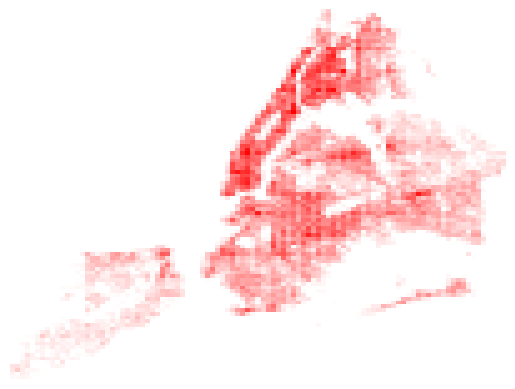

In [17]:
import pandas as pd
import numpy as np
import matplotlib


import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load crime data
crime_data = pd.read_csv('crimedata.csv')

# Filter out rows with missing latitude or longitude
crime_data = crime_data.dropna(subset=['Latitude', 'Longitude'])
crime_data = crime_data[(crime_data['Latitude'] != 0) & (crime_data['Longitude'] != 0)]

# Convert 'Latitude' and 'Longitude' to decimal with precision 3
decimal_precision = 3
crime_data['Latitude'] = crime_data['Latitude'].round(decimal_precision)
crime_data['Longitude'] = crime_data['Longitude'].round(decimal_precision)

# Group by latitude and longitude, summing up total occurrences
all_crime_counts = crime_data.groupby(['Latitude', 'Longitude']).size().reset_index(name='TotalCrimeCount')

# Apply a logarithmic transformation to crime counts to reduce the scale
# all_crime_counts['TotalCrimeCount'] = np.log1p(all_crime_counts['TotalCrimeCount'])

# Set up the figure and axis
fig, ax = plt.subplots(frameon=False)

# Define a custom colormap from transparent to red
colors = [(1, 0, 0, i) for i in np.linspace(0,1,100)]  # Varying alpha values
cmap_rb = matplotlib.colors.LinearSegmentedColormap.from_list('rb_cmap',colors,512)
 
# # Create a 2D histogram of the crime data with transparency
hist = ax.hist2d(all_crime_counts['Longitude'], all_crime_counts['Latitude'],
                 bins=[np.linspace(all_crime_counts['Longitude'].min(), all_crime_counts['Longitude'].max(), 100),
                       np.linspace(all_crime_counts['Latitude'].min(), all_crime_counts['Latitude'].max(), 100)],
                 weights=all_crime_counts['TotalCrimeCount'], cmap=cmap_rb, cmin=1)


# Remove borders and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Remove the border completely
plt.axis('off')

# Save the heatmap as an image (PNG) with transparency and higher resolution
plt.savefig('transparent_no_border_custom_red_crime_heatmap.png', bbox_inches='tight', pad_inches=0)

# Display the heatmap
plt.show()
